Inspired from notebooks: https://nbviewer.jupyter.org/github/jorisvandenbossche/talks/blob/master/2017_EuroScipy_geopandas/geopandas_demo.ipynb

In [4]:
%matplotlib inline

import pandas as pd

import geopandas
from shapely.geometry import Point, Polygon

pd.options.display.max_rows = 10

In [5]:
#https://jorisvandenbossche.github.io/blog/2017/09/19/geopandas-cython/
#https://opendata.paris.fr/explore/dataset/quartier_paris/export/?location=12,48.85889,2.34692&basemap=jawg.streets
#https://opendata.paris.fr/explore/dataset/velib-disponibilite-en-temps-reel/export/
import geopandas as gpd
districts = gpd.read_file("https://opendata.paris.fr/explore/dataset/quartier_paris/download/?format=geojson&timezone=Europe/Paris")
districts.head()


,n_sq_qu,n_sq_ar,c_qu,surface,l_qu,perimetre,c_quinsee,c_ar,geometry
0,750000043,750000011,43,1.172087e+06,Roquette,4973.010557,7511103,11,"POLYGON ((2.37972 48.85344, 2.37937 48.85339, ..."
1,750000012,750000003,12,2.133164e+05,Sainte-Avoie,1861.804114,7510304,3,"POLYGON ((2.35822 48.86122, 2.35690 48.86007, ..."
2,750000036,750000009,36,5.004354e+05,Rochechouart,2862.450525,7510904,9,"POLYGON ((2.34971 48.88222, 2.34983 48.88109, ..."
3,750000041,750000011,41,7.257525e+05,Folie-Méricourt,3724.352694,7511101,11,"POLYGON ((2.37010 48.86376, 2.36690 48.86246, ..."
4,750000078,750000020,78,1.486971e+06,Saint-Fargeau,5405.036433,7512002,20,"POLYGON ((2.41381 48.87081, 2.41383 48.87066, ..."


In [6]:
import geopandas as gpd
stations = gpd.read_file("https://opendata.paris.fr/explore/dataset/velib-disponibilite-en-temps-reel/download/?format=geojson&timezone=Europe/Paris")

In [7]:
stations.columns

Index(['nbfreeedock', 'nbebike', 'station_state', 'maxbikeoverflow', 'nbedock',
       'station_type', 'overflowactivation', 'station_code', 'densitylevel',
       'creditcard', 'station_name', 'nbdock', 'station', 'nbbike',
       'nbfreedock', 'overflow', 'nbbikeoverflow', 'duedate', 'kioskstate',
       'nbebikeoverflow', 'geometry'],
      dtype='object')

In [8]:
stations[['station_state', 'station_name', 'nbedock', 'nbebike', 'nbfreeedock', 'nbebikeoverflow', 'geometry']].head()

,station_state,station_name,nbedock,nbebike,nbfreeedock,nbebikeoverflow,geometry
0,Operative,Benjamin Godard - Victor Hugo,35,2,24,0,POINT (2.27572 48.86598)
1,Operative,André Mazet - Saint-André des Arts,52,5,27,0,POINT (2.33910 48.85376)
2,Operative,Faubourg Du Temple - Republique,38,5,30,0,POINT (2.36490 48.86787)
3,Operative,Toudouze - Clauzel,21,1,20,0,POINT (2.33736 48.87930)
4,Operative,Charonne - Robert et Sonia Delauney,20,2,16,0,POINT (2.39257 48.85591)


In [9]:
type(stations)

geopandas.geodataframe.GeoDataFrame

In [10]:
stations.geometry

0       POINT (2.27572 48.86598)
1       POINT (2.33910 48.85376)
2       POINT (2.36490 48.86787)
3       POINT (2.33736 48.87930)
4       POINT (2.39257 48.85591)
                  ...           
1385    POINT (2.25585 48.87531)
1386    POINT (2.40093 48.83481)
1387    POINT (2.36311 48.82470)
1388    POINT (2.37832 48.86419)
1389    POINT (2.33255 48.84661)
Name: geometry, Length: 1390, dtype: geometry

In [11]:
type(stations.geometry)

geopandas.geoseries.GeoSeries

In [12]:
type(stations.geometry[0])

shapely.geometry.point.Point

In [13]:
operative_stations = stations[stations['station_state'] == 'Operative'].copy()

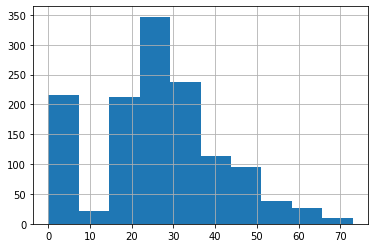

In [14]:
operative_stations['nbedock'].hist()

In [15]:
districts.geometry.area

0     0.000144
1     0.000026
2     0.000061
3     0.000089
4     0.000182
        ...   
75    0.000088
76    0.000106
77    0.000145
78    0.000169
79    0.000234
Length: 80, dtype: float64

In [16]:
import geopy
geopy.geocoders.options.default_user_agent = "jupyter-xebicon-19"

In [17]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("Notre Dame Paris")
notre_dame = Point(location.longitude, location.latitude)
print(notre_dame)

POINT (2.3500501225 48.85293705)


In [18]:
stations.geometry.distance(notre_dame)

0       0.075461
1       0.010985
2       0.021060
3       0.029255
4       0.042624
          ...   
1385    0.096823
1386    0.054010
1387    0.031113
1388    0.030423
1389    0.018610
Length: 1390, dtype: float64

In [19]:
districts.contains(notre_dame)

0     False
1     False
2     False
3     False
4     False
      ...  
75    False
76    False
77    False
78    False
79    False
Length: 80, dtype: bool

In [20]:
districts[districts.contains(notre_dame)]

,n_sq_qu,n_sq_ar,c_qu,surface,l_qu,perimetre,c_quinsee,c_ar,geometry
23,750000016,750000004,16,378252.153674,Notre-Dame,3283.163371,7510404,4,"POLYGON ((2.36131 48.84858, 2.36151 48.84823, ..."


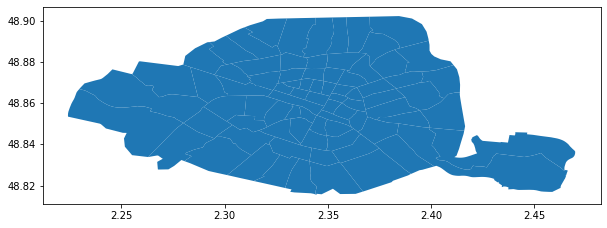

In [21]:
districts.plot(figsize=(10, 10))

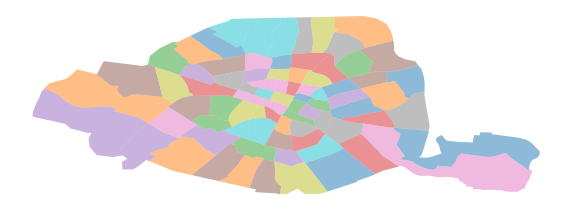

In [22]:
ax = districts.plot(figsize=(10, 10), cmap='tab10', alpha=0.5)
ax.set_axis_off()

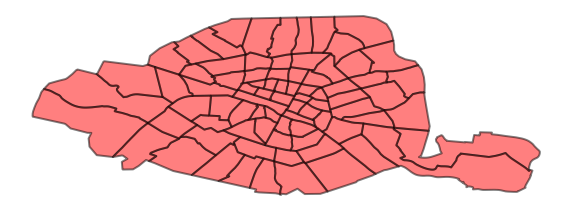

In [23]:
ax = districts.plot(figsize=(10, 10), edgecolor='k', facecolor='r', alpha=0.5, linewidth=2)
ax.set_axis_off()

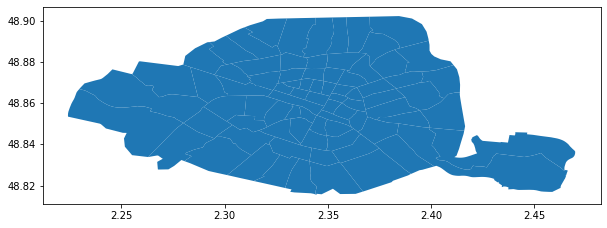

In [24]:
districts.plot(markersize=5, figsize=(10, 10))

In [25]:
#import osmnx as ox
#G = ox.graph_from_place('Paris, France', network_type='drive')
#ox.save_graph_shapefile(G, 'openstreetmap_paris', folder='.')

In [26]:
streets = geopandas.read_file("openstreetmap_paris/edges/")

In [27]:
streets.head()

,key,osmid,name,highway,maxspeed,oneway,length,from,to,junction,bridge,lanes,service,tunnel,ref,access,width,area,geometry
0,0,573814820,Rue Raoul Dufy,residential,30,False,35.57,148942879,5509971973,None,None,None,None,None,None,None,None,None,"LINESTRING (2.39117 48.86514, 2.39113 48.86520..."
1,0,"[8059024, 362885203, 231974351]",None,trunk_link,None,True,311.12699999999995,166297606,25240349,None,None,None,None,None,None,None,None,None,"LINESTRING (2.36014 48.81642, 2.35994 48.81639..."
2,0,"[59942017, 85730575]",Avenue de la Porte d'Italie,primary,30,True,42.131,166297606,249076496,circular,yes,3,None,None,None,None,None,None,"LINESTRING (2.36014 48.81642, 2.36008 48.81631..."
3,0,85730573,Avenue de la Porte d'Italie,primary,50,True,25.944,166300778,166297606,circular,None,None,None,None,None,None,None,None,"LINESTRING (2.36050 48.81641, 2.36014 48.81642)"
4,0,16289233,Avenue de la Porte d'Italie,primary,30,True,41.721,644165,166297606,None,None,None,None,None,None,None,None,None,"LINESTRING (2.36020 48.81679, 2.36018 48.81673..."


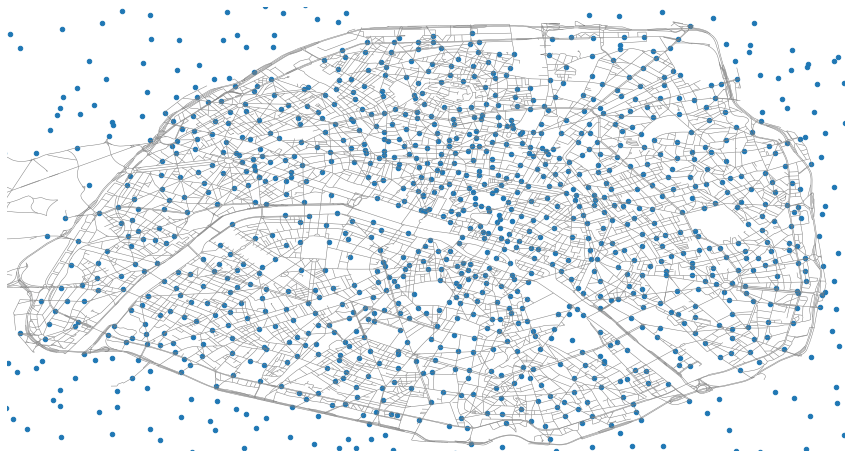

In [28]:
ax = streets.plot(linewidth=0.5, color='grey', figsize=(15, 10))
stations.plot(ax=ax, markersize=20)
ax.set(xlim=(2.25, 2.42), ylim=(48.815, 48.905));
ax.set_axis_off()

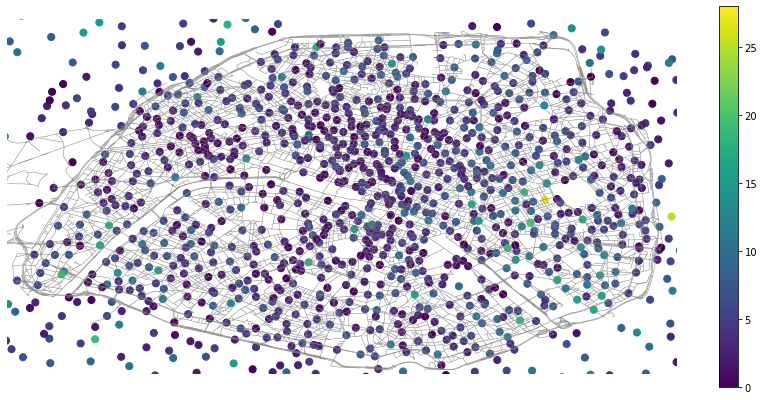

In [29]:
ax = streets.plot(linewidth=0.5, color='grey', figsize=(15, 7))
stations.plot(ax=ax, column='nbebike', markersize=50, legend=True)
ax.set(xlim=(2.25, 2.42), ylim=(48.815, 48.905));
ax.set_axis_off()

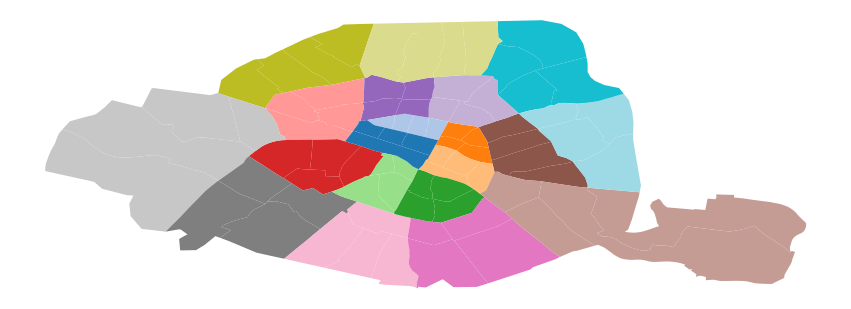

In [30]:
ax = districts.plot(column='n_sq_ar', categorical=True, cmap='tab20', figsize=(15, 8))
ax.set_axis_off()

In [31]:
stations_per_district = geopandas.sjoin(stations, districts[['l_qu', 'geometry']].copy(), op='within')

In [32]:
stations_per_district.head()

,nbfreeedock,nbebike,station_state,maxbikeoverflow,nbedock,station_type,overflowactivation,station_code,densitylevel,creditcard,...,nbbike,nbfreedock,overflow,nbbikeoverflow,duedate,kioskstate,nbebikeoverflow,geometry,index_right,l_qu
0,24,2,Operative,0,35,yes,no,16107,1,no,...,9,0,no,0,2018-07-15,yes,0,POINT (2.27572 48.86598),45,Porte-Dauphine
213,39,3,Operative,0,50,yes,no,16122,1,yes,...,8,0,no,0,2018-12-18,yes,0,POINT (2.25877 48.87989),45,Porte-Dauphine
257,33,3,Operative,0,38,yes,no,16108,1,no,...,2,0,no,0,2018-07-15,yes,0,POINT (2.28189 48.86388),45,Porte-Dauphine
326,0,0,Work in progress,0,0,no,no,15133,1,no,...,0,1,no,1,2019-12-31,no,0,POINT (2.26659 48.86872),45,Porte-Dauphine
355,24,3,Operative,0,33,yes,no,16121,1,yes,...,5,0,no,0,2018-09-24,yes,0,POINT (2.27077 48.87877),45,Porte-Dauphine


In [33]:
counts = stations_per_district.groupby('l_qu').size()
counts

l_qu
Amérique           16
Archives            3
Arsenal             6
Arts-et-Métiers     4
Auteuil            21
                   ..
Sorbonne           11
Ternes             17
Val-de-Grâce        8
Villette           14
Vivienne            6
Length: 80, dtype: int64

In [34]:
districts = districts.merge(counts.reset_index(name='nb_ebike_stations'))

In [35]:
districts.head()

,n_sq_qu,n_sq_ar,c_qu,surface,l_qu,perimetre,c_quinsee,c_ar,geometry,nb_ebike_stations
0,750000043,750000011,43,1.172087e+06,Roquette,4973.010557,7511103,11,"POLYGON ((2.37972 48.85344, 2.37937 48.85339, ...",13
1,750000012,750000003,12,2.133164e+05,Sainte-Avoie,1861.804114,7510304,3,"POLYGON ((2.35822 48.86122, 2.35690 48.86007, ...",4
2,750000036,750000009,36,5.004354e+05,Rochechouart,2862.450525,7510904,9,"POLYGON ((2.34971 48.88222, 2.34983 48.88109, ...",13
3,750000041,750000011,41,7.257525e+05,Folie-Méricourt,3724.352694,7511101,11,"POLYGON ((2.37010 48.86376, 2.36690 48.86246, ...",14
4,750000078,750000020,78,1.486971e+06,Saint-Fargeau,5405.036433,7512002,20,"POLYGON ((2.41381 48.87081, 2.41383 48.87066, ...",15


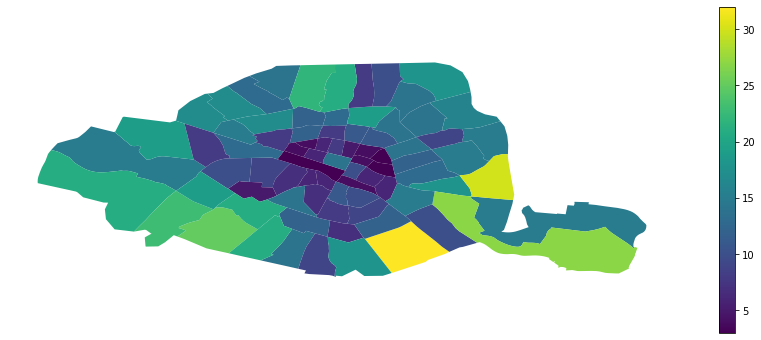

In [36]:
ax = districts.plot(column='nb_ebike_stations', figsize=(15, 6), legend=True)
ax.set_axis_off()

In [37]:
districts['nb_ebike_stations_relative_to_area'] = districts['nb_ebike_stations'] / districts.geometry.area

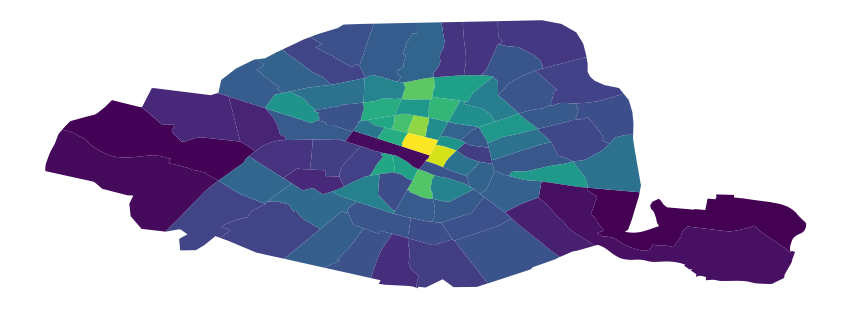

In [38]:
ax = districts.plot(column='nb_ebike_stations_relative_to_area', figsize=(15, 6))
ax.set_axis_off()

In [39]:
stations.crs

{'init': 'epsg:4326'}

In [40]:
stations.geometry.head(3)

0    POINT (2.27572 48.86598)
1    POINT (2.33910 48.85376)
2    POINT (2.36490 48.86787)
Name: geometry, dtype: geometry

In [41]:
stations_epsg_32631 = stations.to_crs(epsg=32631)

In [42]:
stations_epsg_32631.geometry.head(3)

0    POINT (446882.902 5412810.787)
1    POINT (451518.572 5411409.280)
2    POINT (453424.429 5412962.392)
Name: geometry, dtype: geometry

In [43]:
districts_epsg_32631 = districts.to_crs(epsg=32631)

In [44]:
(districts_epsg_32631.geometry.area / 1000**2)

0     1.171460
1     0.213201
2     0.500154
3     0.725354
4     1.486139
        ...   
75    0.715780
76    0.860867
77    1.180965
78    1.377745
79    1.904462
Length: 80, dtype: float64

In [64]:
print(districts.to_json())

{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"c_ar": 11, "c_qu": 43, "c_quinsee": 7511103, "l_qu": "Roquette", "n_sq_ar": 750000011, "n_sq_qu": 750000043, "nb_ebike_stations": 13, "nb_ebike_stations_relative_to_area": 90491.11379770291, "perimetre": 4973.0105569, "surface": 1172086.94385734}, "geometry": {"type": "Polygon", "coordinates": [[[2.379720818886926, 48.85344088482293], [2.379372796772585, 48.853386242411695], [2.378686346436463, 48.85329169615559], [2.378098933648728, 48.85324108321989], [2.377382045439409, 48.85327259523968], [2.377153255138963, 48.85327219684274], [2.377025570543497, 48.853271972807796], [2.376738153423257, 48.85327147161774], [2.375437900457549, 48.85331165675364], [2.3752209983094152, 48.85326008694227], [2.374605815911755, 48.85298735537123], [2.373787214093654, 48.85186519672007], [2.373551931948096, 48.8519314633399], [2.371968671538228, 48.85239572579151], [2.371886636273745, 48.85242357172466], [2.37185296

In [45]:
import folium

In [66]:
m = folium.Map([48.8566, 2.3429], zoom_start=12, tiles="OpenStreetMap")
#print(districts)
m.choropleth(geo_data=districts, data=districts, columns=['c_quinsee', 'nb_ebike_stations_relative_to_area'],
             key_on='feature.properties.c_quinsee', fill_color='BuGn', highlight=True)
m

/home/akinsella/.local/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
